In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

ImportError: No module named cufflinks

In [151]:
df = pd.read_csv('../budget_report_2019-03-31.csv', 
                 sep=';', 
                 parse_dates=['date'],
                 index_col='date')
df['amount'] = df['amount'].abs()

df18 = df.loc['2019-01-01':'2018-01-01']
df18 = df.drop(['ref_currency_amount', 
                'payment_type', 
                'payment_type_local', 
                'gps_latitude', 
                'gps_longitude', 
                'gps_accuracy_in_meters',
                'warranty_in_month',
                'transfer',
                'custom_category'],
               axis=1)

In [152]:
df18.head()

,account,category,currency,amount,type,note,payee,labels,envelope_id
date,,,,,,,,,
2019-03-18 12:41:50,Monthly expenses,"Restaurant, fast-food",EUR,4.50,Expenses,turkish lunch,NaN,Household,1001
2019-03-16 18:14:26,Monthly expenses,Groceries,EUR,13.88,Expenses,NaN,Aldi,Household,1000
2019-03-16 00:27:10,Monthly expenses,Internet,EUR,19.95,Expenses,temporary internet,Telecom Fon,Household,7002
2019-03-15 16:03:17,Monthly expenses,Groceries,EUR,6.52,Expenses,NaN,lidl,Household,1000
2019-03-15 15:54:07,Monthly expenses,"Wellness, beauty",EUR,14.00,Expenses,haircut asish,NaN,Household,6001


In [105]:
# df[['category','envelope_id']].drop_duplicates().sort_values('envelope_id')
# df.dtypes

In [5]:
df['2017-11'].amount.sum()

2073.1300000000001

In [106]:
# Grocery History
df18.amount.resample('M').sum().iplot(kind='bar')

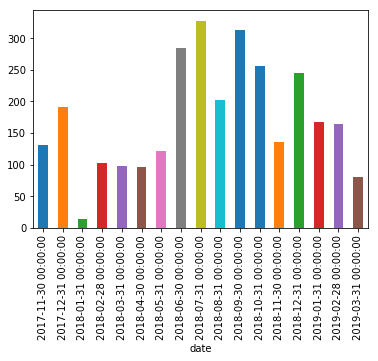

In [8]:
df[df['category'] == 'Groceries'].amount.resample('M').sum().plot(kind='bar')

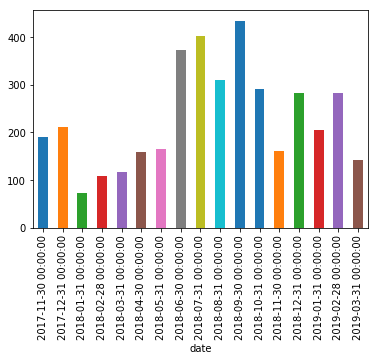

In [100]:
df[df['envelope_id'] < 2000].amount.resample('M').sum().plot(kind='bar')

In [17]:
import plotly.graph_objs as go

In [138]:
# bar = df.amount.resample('M').sum().iplot(kind='bar')

def average_sampler(data):
    print('------------')
    print(data)
    return np.mean(data)
    
df18.amount.resample('Y').sum()


date
2018-12-31    27616.36
Freq: A-DEC, Name: amount, dtype: float64